In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
 #Download the cifar-10 dataset included in Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [5]:
# Print the number of samples 
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 50000
X_test: 10000


In [6]:
# Print a sample from X_test dataset
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


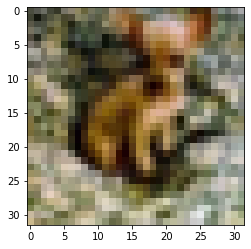

(32, 32, 3)


In [7]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[779])
plt.show()
# Print the shape of the sample image
print(X_test[779].shape)

In [8]:
# Create the validation datasets 
# and assign the last 10000 images of X_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]

# Create new train datasets
# and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

In [9]:
# Print the lengths of the each dataset
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")

X_train: 40000
X_val: 10000
X_test: 10000


In [10]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [11]:
# Create a model object
model = tf.keras.Sequential()

In [12]:

# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [13]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [14]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [15]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [16]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [27]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="relu"))

In [17]:

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
313/313 [==============================] - 12s 9ms/step - loss: 2.0948 - accuracy: 0.2050 - val_loss: 1.7331 - val_accuracy: 0.3619
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7091 - accuracy: 0.3484 - val_loss: 1.4193 - val_accuracy: 0.4848
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5367 - accuracy: 0.4245 - val_loss: 1.3574 - val_accuracy: 0.5243
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4196 - accuracy: 0.4770 - val_loss: 1.1757 - val_accuracy: 0.5774
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3380 - accuracy: 0.5146 - val_loss: 1.1221 - val_accuracy: 0.6082
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2654 - accuracy: 0.5407 - val_loss: 1.0859 - val_accuracy: 0.6278
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 1.2168 - accuracy: 0.5630 - val_loss: 1.0157 - val_accuracy: 0.6491
Epoch

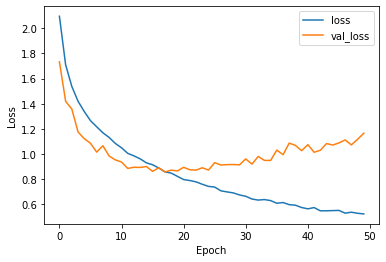

In [19]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")


# Put legend table
plt.legend()

# Show the plot
plt.show()

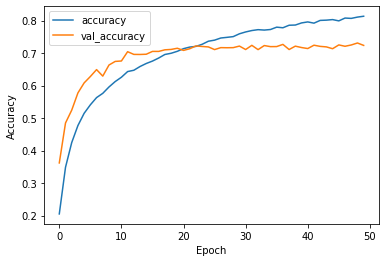

In [20]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [21]:
# Evaluate the performance
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2340 - accuracy: 0.7140


[1.2339729070663452, 0.7139999866485596]

In [22]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 164ms/step


array([[2.7700505e-06, 2.9556644e-09, 1.0043708e-15, 4.6524195e-18,
        2.7876790e-21, 1.0278646e-20, 1.1252620e-16, 8.3105579e-25,
        9.9999726e-01, 2.5641678e-12]], dtype=float32)

In [23]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [24]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 8 with 0.9999972581863403 probability %
